In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import sys

%matplotlib inline

In [2]:
sales = pd.read_csv('https://raw.githubusercontent.com/rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv')

# lecture 1 

### data

In [3]:
sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [4]:
sales.shape

(113036, 18)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [6]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### numerical variables

In [7]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

<Axes: >

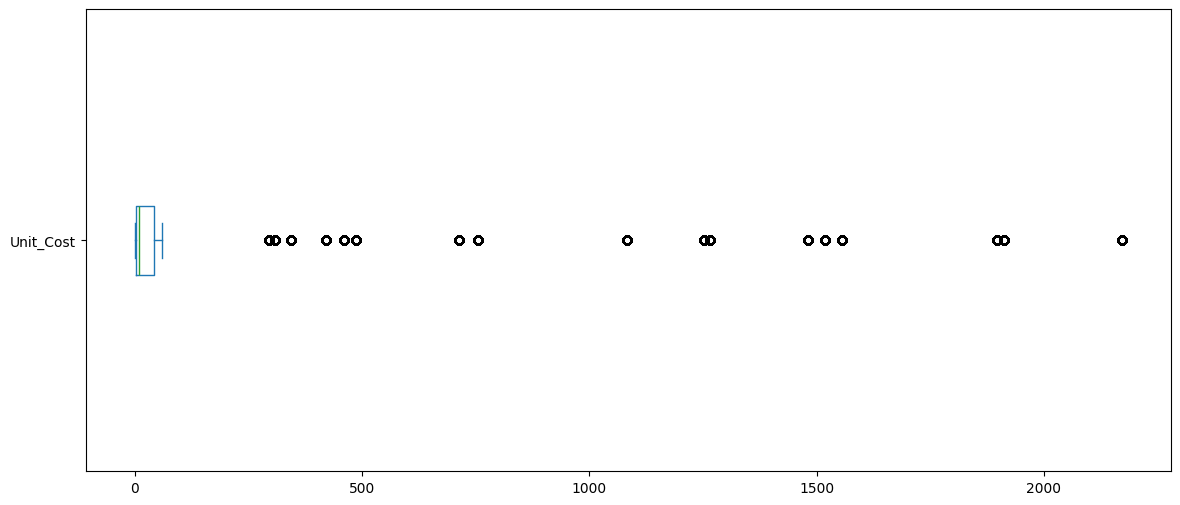

In [8]:
sales['Unit_Cost'].plot(kind = 'box', vert = False, figsize = (14,6))

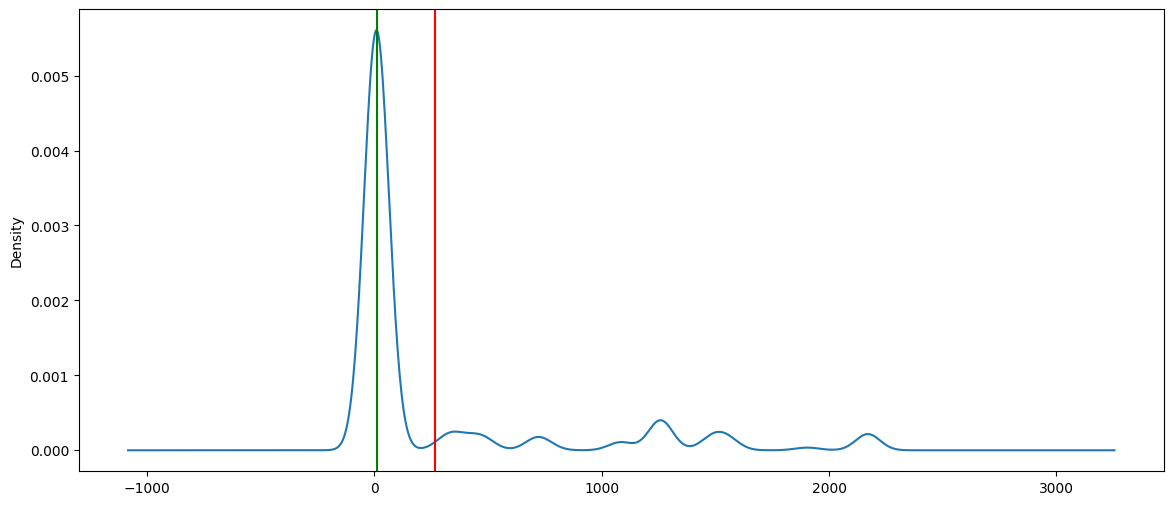

In [9]:
density = sales['Unit_Cost'].plot(kind = 'density', figsize = (14,6))
density.axvline(sales['Unit_Cost'].mean(), color = 'red')
density.axvline(sales['Unit_Cost'].median(), color = 'green')

Text(0.5, 0, 'dollars')

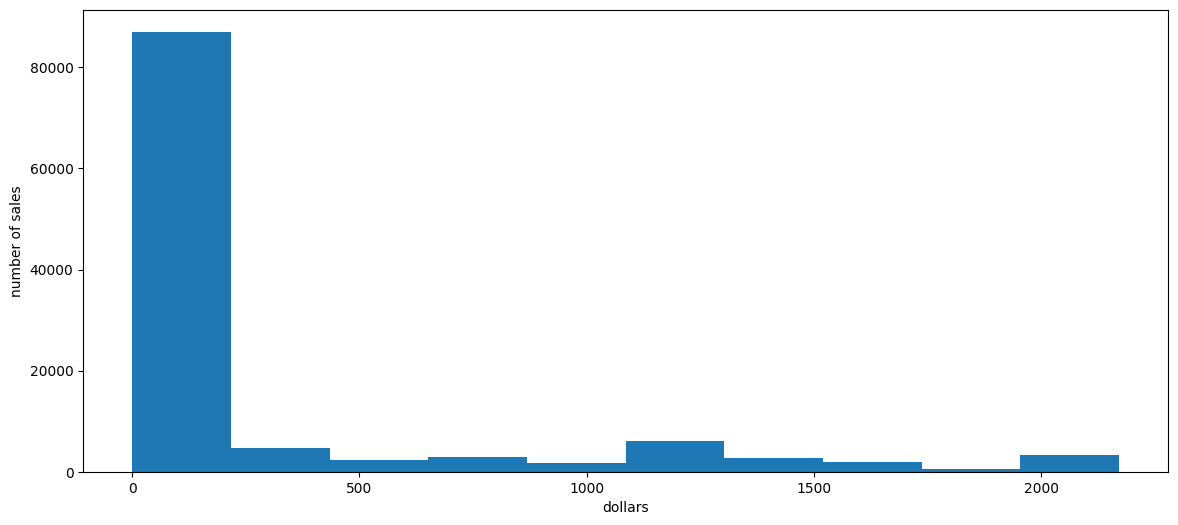

In [10]:
bar_plot = sales['Unit_Cost'].plot(kind = 'hist', figsize = (14,6))
bar_plot.set_ylabel('number of sales')
bar_plot.set_xlabel('dollars')

### categorical variables

In [11]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

<Axes: ylabel='count'>

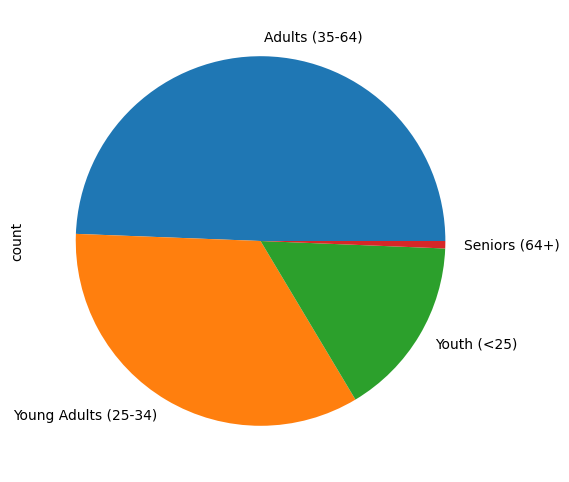

In [12]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: xlabel='Age_Group'>

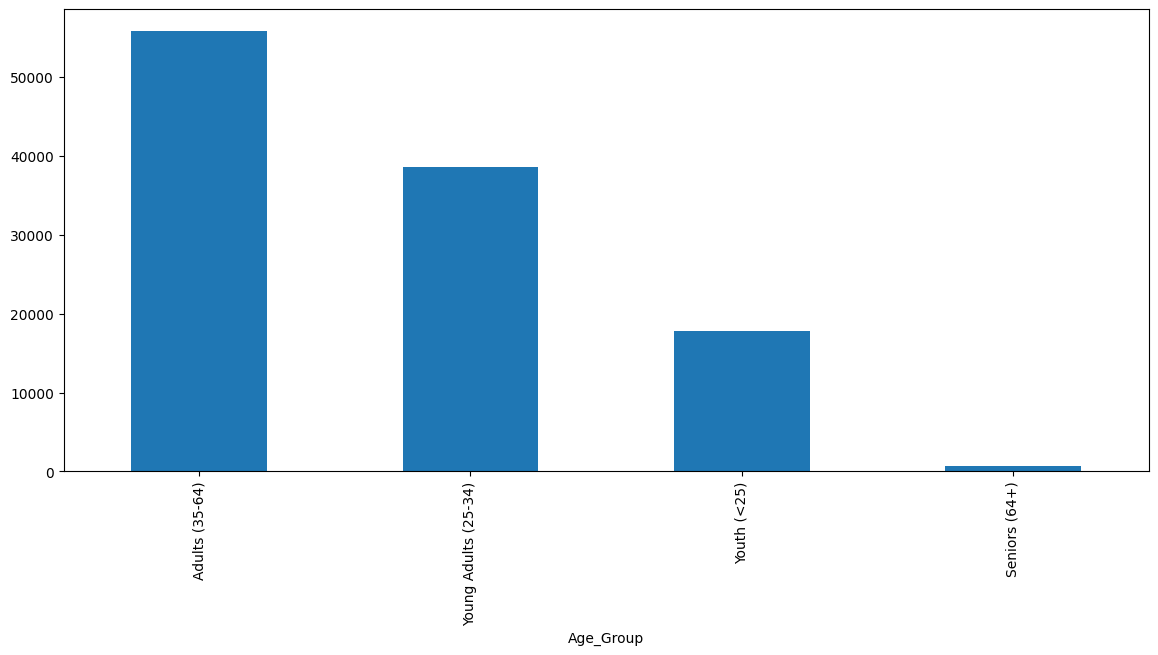

In [13]:
sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))

### relationship between the columns

In [14]:
corr = sales.select_dtypes(include = ['number']).corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


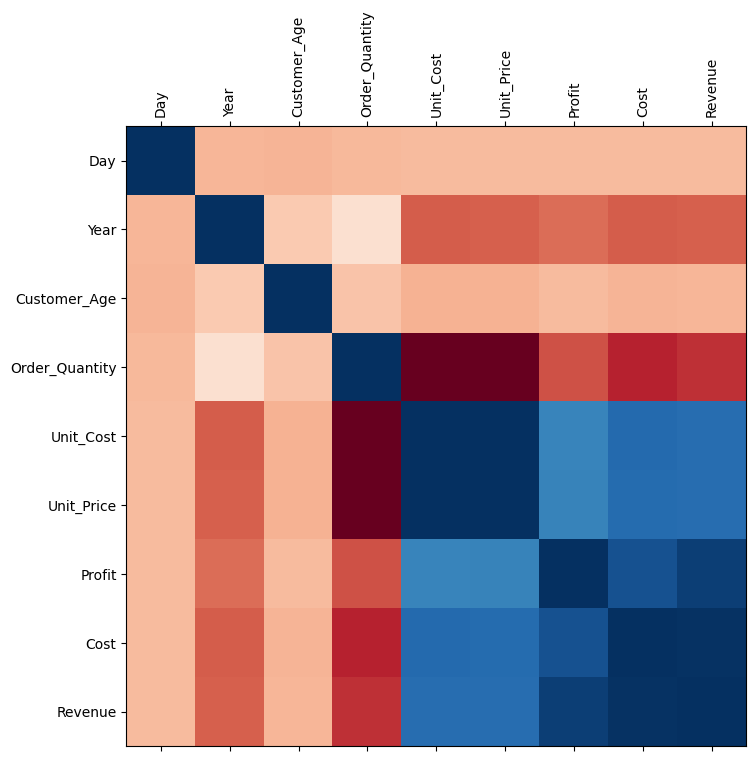

In [15]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<Axes: >

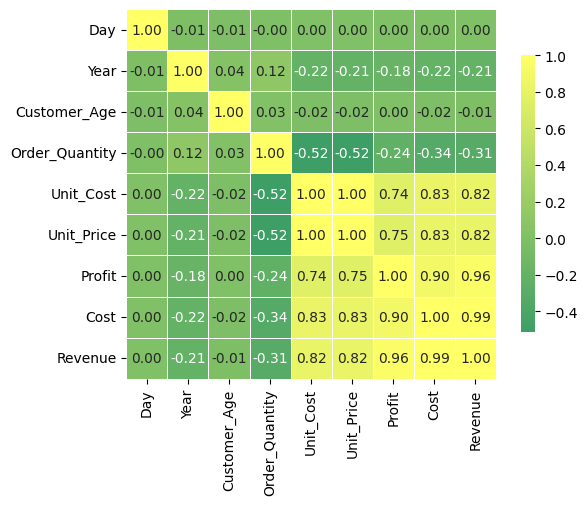

In [16]:
sns.heatmap(corr, annot=True, cmap='summer', center=0, fmt='.2f', square=True, cbar_kws={"shrink": .75}, linewidths=0.5)

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

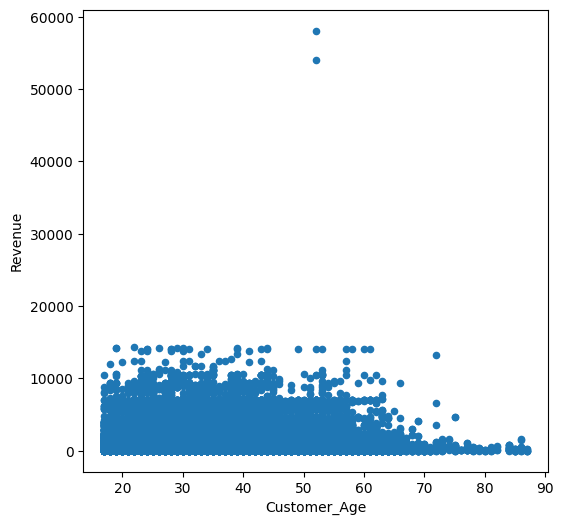

In [17]:
sales.plot(kind = 'scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

<Axes: xlabel='Revenue', ylabel='Profit'>

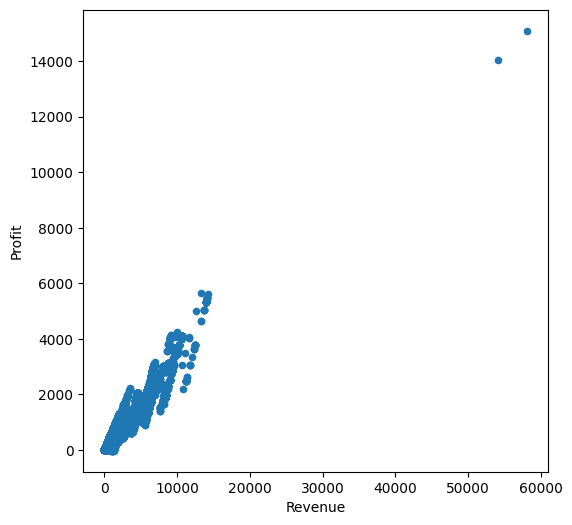

In [18]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

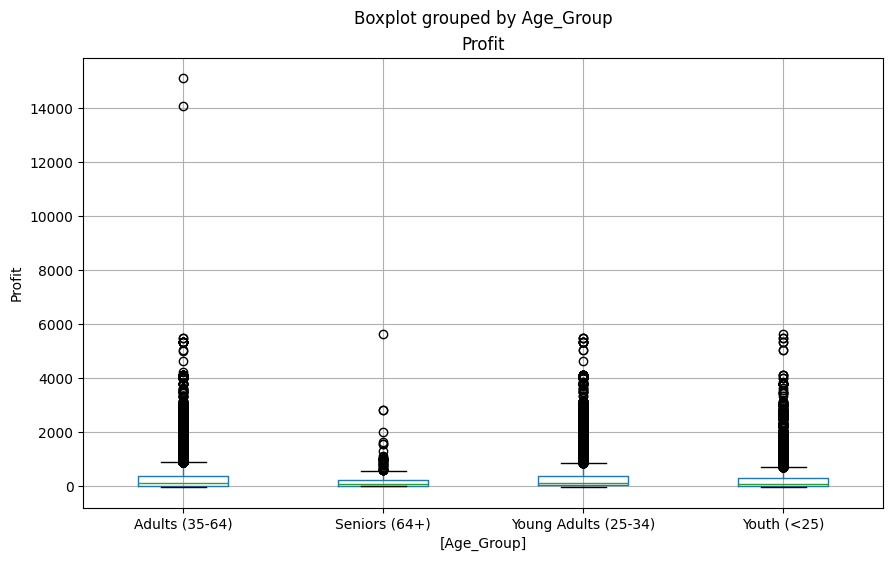

In [19]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Day                  Axes(0.125,0.653529;0.227941x0.226471)
Year              Axes(0.398529,0.653529;0.227941x0.226471)
Customer_Age      Axes(0.672059,0.653529;0.227941x0.226471)
Order_Quantity       Axes(0.125,0.381765;0.227941x0.226471)
Unit_Cost         Axes(0.398529,0.381765;0.227941x0.226471)
Unit_Price        Axes(0.672059,0.381765;0.227941x0.226471)
Profit                   Axes(0.125,0.11;0.227941x0.226471)
Cost                  Axes(0.398529,0.11;0.227941x0.226471)
Revenue               Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

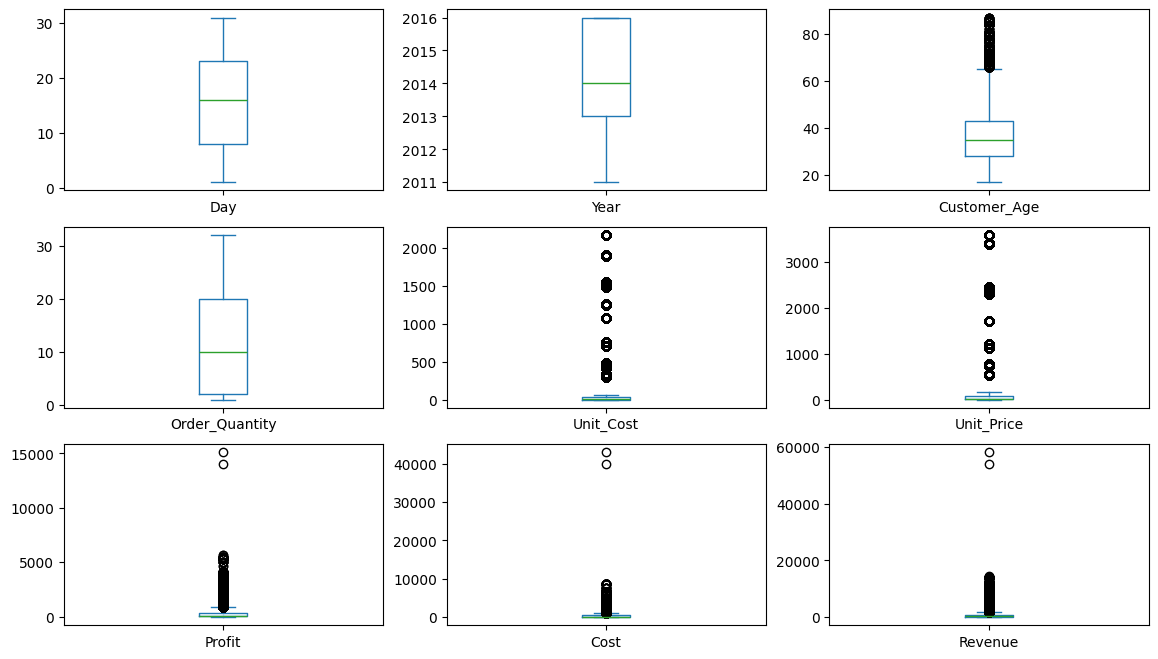

In [20]:
sales.select_dtypes(include=['number']).plot(kind='box', subplots=True, layout=(3,3), figsize=(14,8))

Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

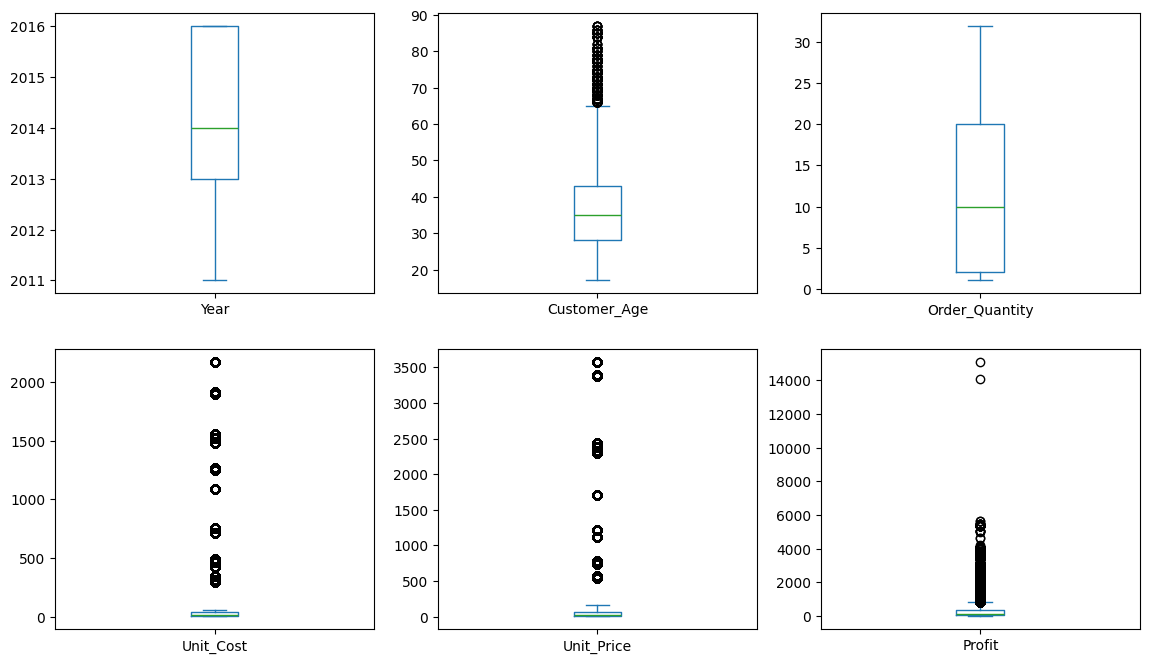

In [21]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

### column wrangling

##### add to the dataset and calculate a new Revenue_per_Age column

In [22]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

In [23]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617


<Axes: ylabel='Density'>

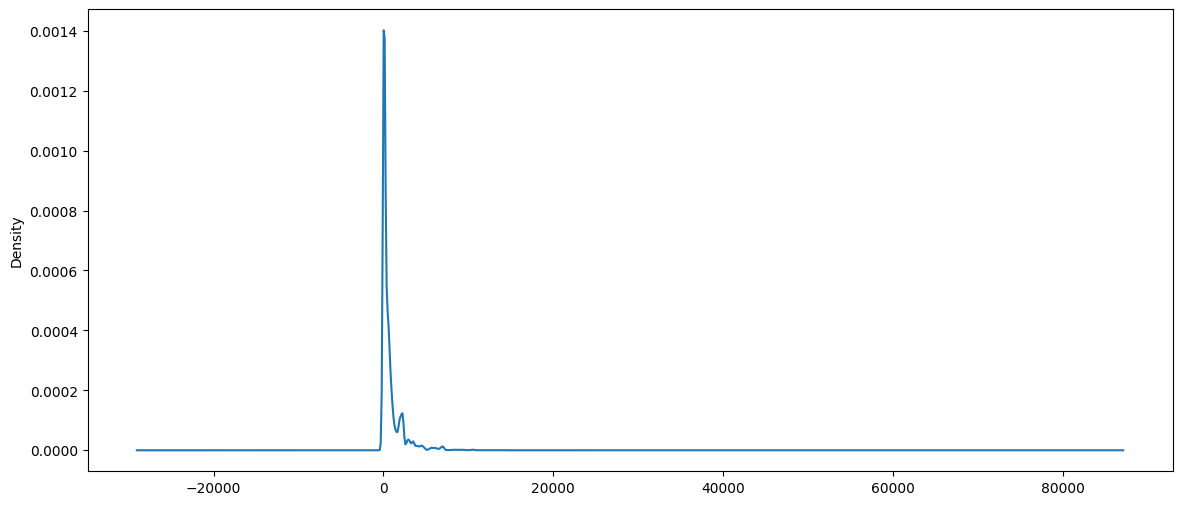

In [24]:
sales['Revenue'].plot(kind='density', figsize=(14,6))

<Axes: ylabel='Density'>

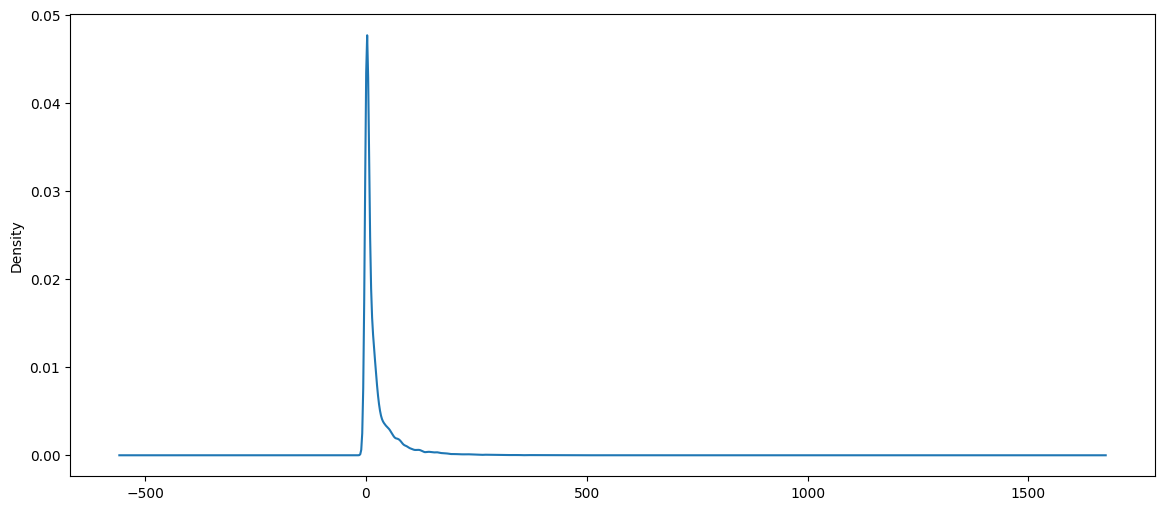

In [25]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<Axes: ylabel='Frequency'>

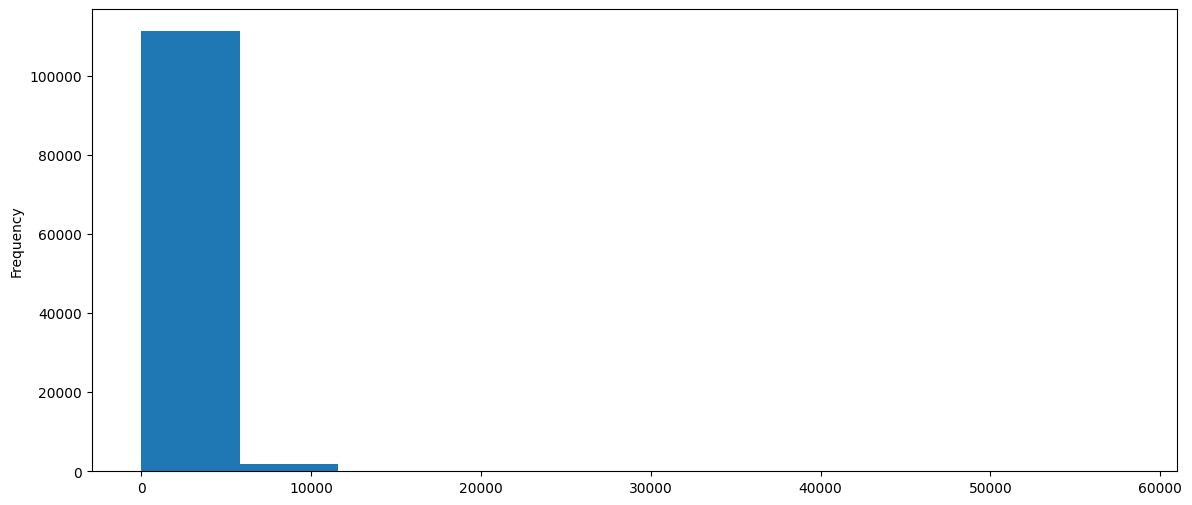

In [26]:
sales['Revenue'].plot(kind='hist', figsize=(14,6))

<Axes: ylabel='Frequency'>

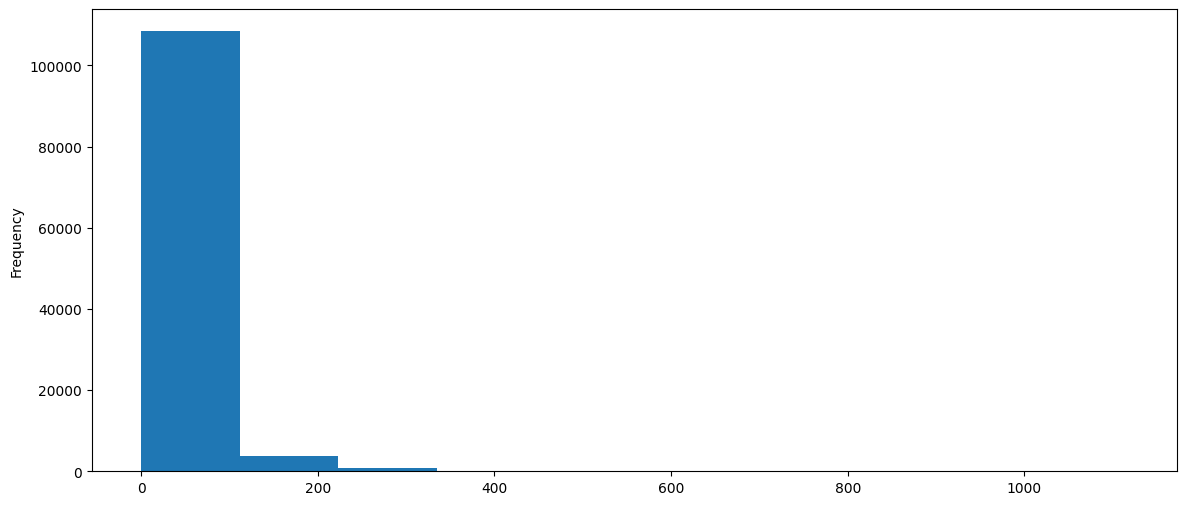

In [27]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

#### add to the dataset and calculate a new Calculated_Cost column

In [28]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [29]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180


In [30]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

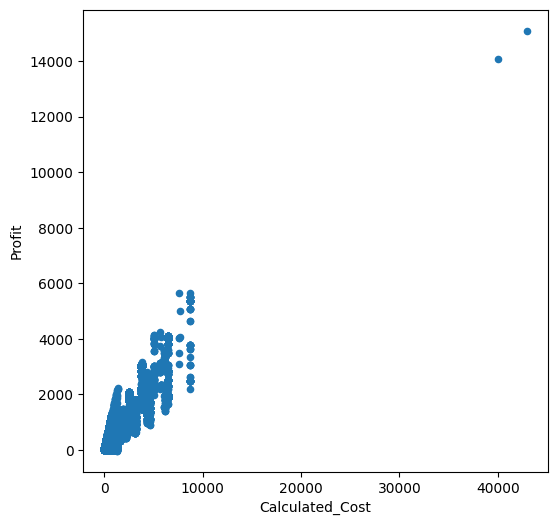

In [31]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

#### add and calculate a new Calculated_Revenue column

In [32]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [33]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

#### modify all Unit_Price values adding 3% tax to them

In [34]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [35]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

In [36]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

### selection and indexing

#### get all the sales made in the state of Kentucky

In [37]:
sales.loc[sales['State'] == 'Kentucky'].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914


#### get the mean revenue of the Adults (35-64) sales group

In [38]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

#### how many records belong to Age Group Youth (<25) or Adults (35-64)?

In [39]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

#### get the mean revenue of the sales group Adults (35-64) in United States

In [40]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

#### increase the revenue by 10% to every sale made in France

In [41]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [42]:
sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

C:\Users\adepa\AppData\Local\Temp\ipykernel_12176\3710265248.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 865.7  865.7 3252.7 ...  473.  1386.  1327.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1


In [43]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

In [44]:
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [45]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     952.27
51     952.27
52    3577.97
53    3449.71
60     757.46
Name: Revenue, dtype: float64

### exercise 1

In [46]:
sales['Customer_Age'].mean()

35.91921157861212

<Axes: ylabel='Density'>

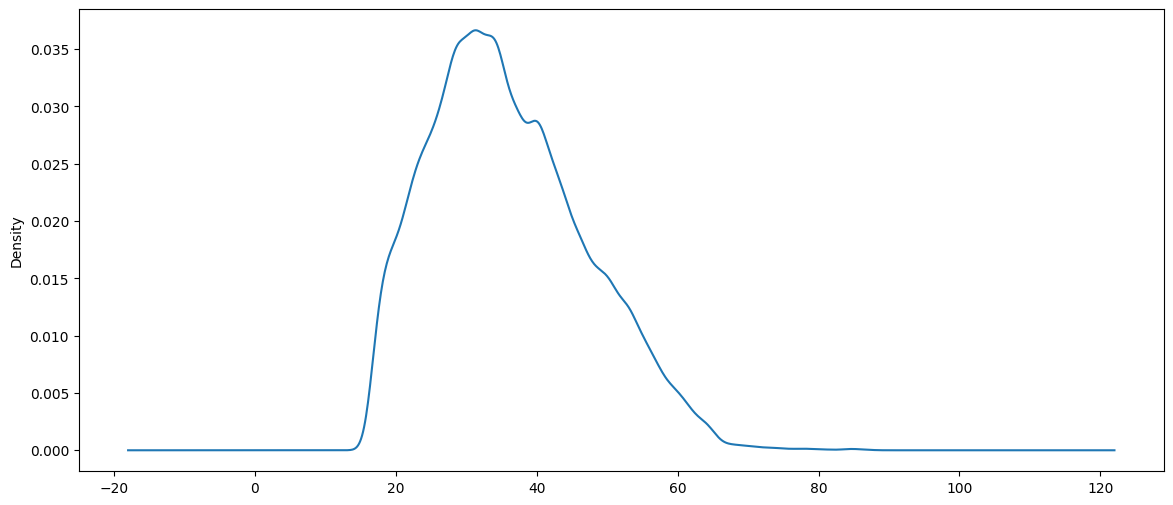

In [47]:
sales['Customer_Age'].plot(kind='density', figsize=(14, 6))

<Axes: >

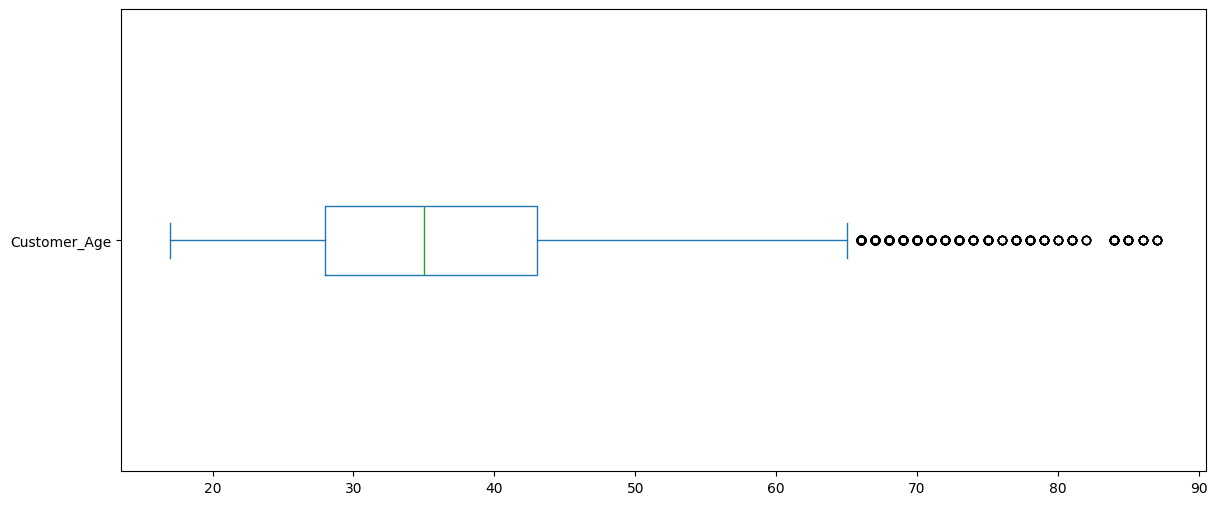

In [48]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

#### how many sales per year do we have?

In [49]:
sales['Year'].value_counts()

Year
2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: count, dtype: int64

<Axes: ylabel='count'>

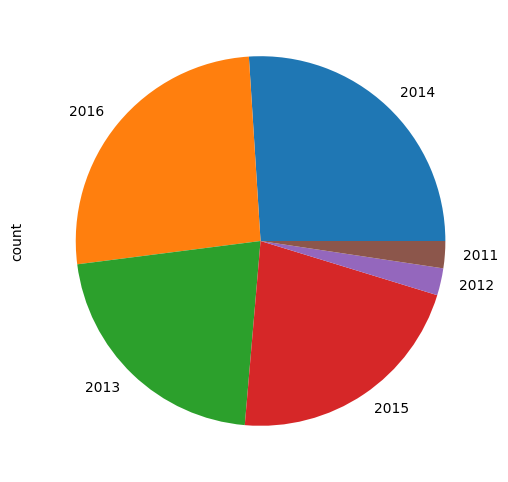

In [50]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

#### how many sales per month do we have ?

In [51]:
sales['Month'].value_counts()

Month
June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: count, dtype: int64

#### which country has the most quantity of sales?

In [52]:
sales['Country'].value_counts().head(1)

Country
United States    39206
Name: count, dtype: int64

#### create a list of every product sold

In [53]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

#### create a bar plot showing the 10 most sold products (best sellers)

<Axes: xlabel='Product'>

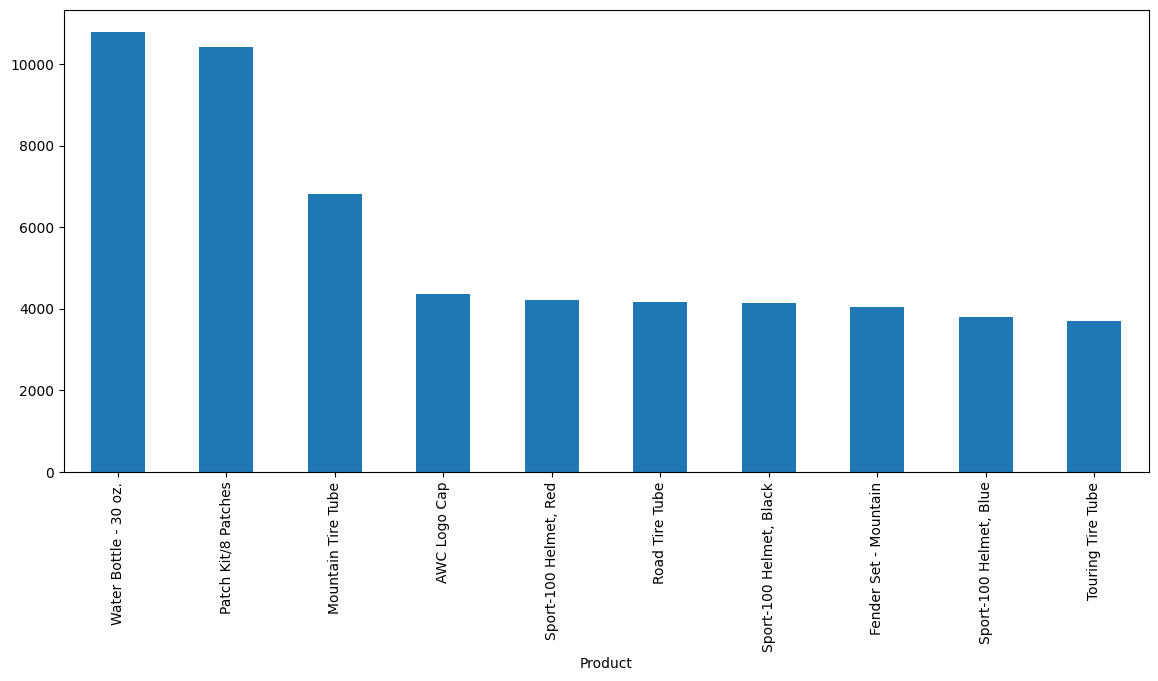

In [54]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

#### can you see any relationship between Unit_Cost and Unit_Price? Show a scatter plot between both columns.

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

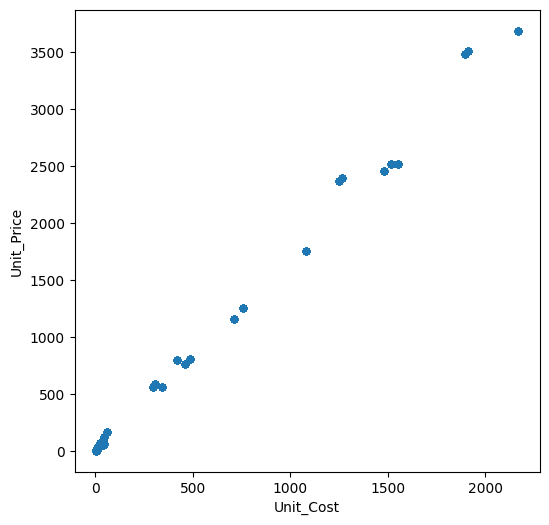

In [55]:
sales.plot(kind='scatter', x = 'Unit_Cost', y = 'Unit_Price', figsize=(6,6))

#### can you see any relationship between the Customer_Age per Country? Show a grouped box plot per country with the customer age values.

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

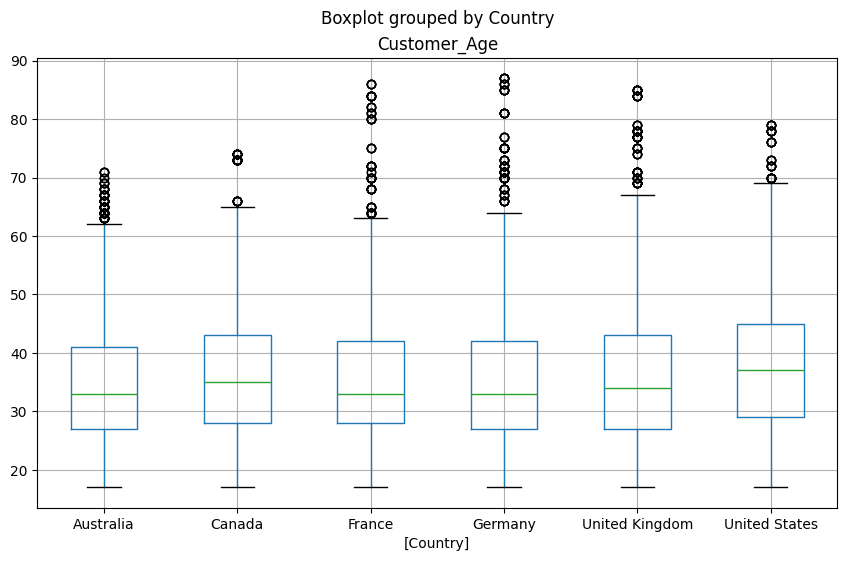

In [56]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

#### add and calculate a new Calculated_Date column. Use Day, Month, Year to create a Date column (YYYY-MM-DD).

In [57]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

C:\Users\adepa\AppData\Local\Temp\ipykernel_12176\223435626.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)


0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

#### parse your Calculated_Date column into a datetime object

In [58]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

#### how did sales evolve through the years? Show a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis.

<Axes: xlabel='Calculated_Date'>

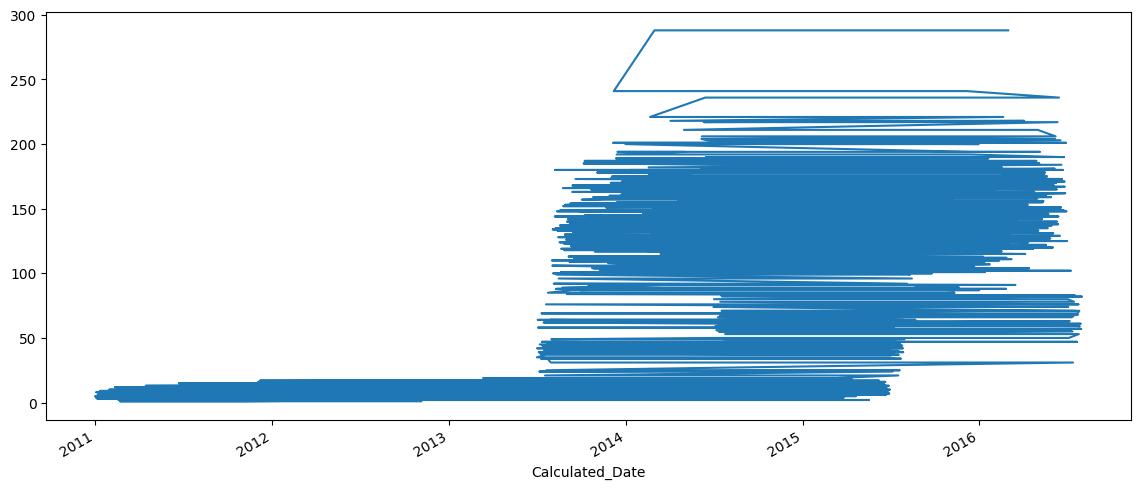

In [59]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

<Axes: xlabel='Year'>

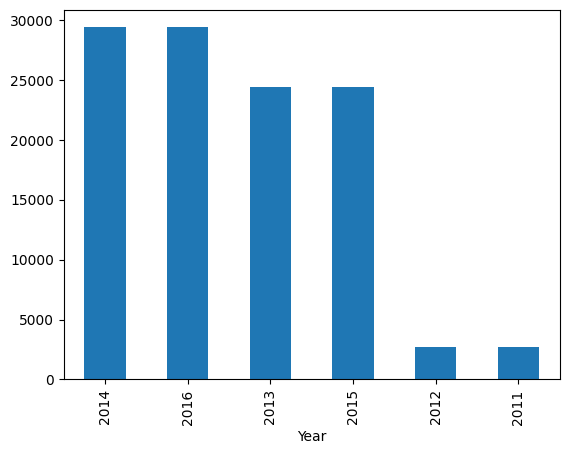

In [60]:
sales['Year'].value_counts().plot(kind='bar')

#### increase 50 US dollars revenue to every sale

In [61]:
sales['Revenue'] = sales['Revenue'] + 50

#### how many orders were made in Canada or Frace

In [62]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

#### how many Bike Racks orders were made from Canada?

In [63]:
sales.loc[(sales['Sub_Category'] == 'Bike Racks') & (sales['Country'] == 'Canada')].shape[0]

104

#### how many orders were made in each region (state) of France?

In [64]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

In [65]:
canadian_state = sales.loc[sales['Country'] == 'Canada', 'State'].value_counts()

canadian_state

State
British Columbia    14116
Alberta                56
Ontario                 6
Name: count, dtype: int64

#### how many sales were made per category?

In [66]:
sales['Product_Category'].value_counts()

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

<Axes: ylabel='count'>

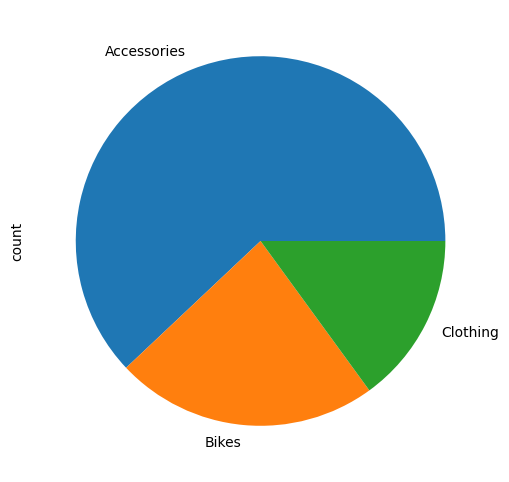

In [67]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

#### how many orders were made per accessory sub-categories?

In [68]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

#### how many orders were made per bike sub-categories?

In [69]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Sub_Category
Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: count, dtype: int64

#### which gender has the most amount of sales?

In [70]:
sales.loc[sales['Order_Quantity'], 'Customer_Gender'].value_counts().head(1)

Customer_Gender
M    86958
Name: count, dtype: int64

In [71]:
sales['Customer_Gender'].value_counts().head(1)

Customer_Gender
M    58312
Name: count, dtype: int64

#### how many sales with more than 500 in Revenue were made by men?

In [72]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] > 500)].shape[0]

23573

#### get the top-5 sales with the highest revenue

In [73]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58124.00,1116.807692,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,...,27,1482,2455.52,14055,40014,54119.00,1039.788462,40014,54069,2013-07-24
58741,2011-02-14,14,February,2011,41,Adults (35-64),M,France,Essonne,Bikes,...,4,2171,3685.34,5056,8684,16675.40,335.121951,8684,13740,2011-02-14
58583,2011-08-22,22,August,2011,37,Adults (35-64),F,France,Nord,Bikes,...,4,2171,3685.34,3767,8684,15115.71,336.513514,8684,12451,2011-08-22
59153,2011-07-15,15,July,2011,23,Youth (<25),M,France,Nord,Bikes,...,4,2171,3685.34,3767,8684,15115.71,541.347826,8684,12451,2011-07-15


#### get the sale with the highest revenue

In [74]:
sales.sort_values(['Revenue'], ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58124.0,1116.807692,42978,58074,2015-07-24


In [75]:
cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58124.0,1116.807692,42978,58074,2015-07-24


#### what is the mean Order_Quantity of orders with more than 10K in revenue?

In [76]:
sales.loc[sales['Revenue']>10000, 'Order_Quantity'].mean()

3.628712871287129

#### how many orders were made between May and July of 2016?

In [77]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

12164

#### add 7.2% TAX on every sale Unit_Price within United States

In [78]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] + sales.loc[sales['Country'] == 'United States', 'Unit_Price']*0.072

In [79]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

In [80]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

# lecture 2

In [81]:
import sqlite3

In [82]:
conn = sqlite3.connect('C:/Users/adepa/OneDrive/Desktop/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [83]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


#### create a list of all the films with the highest replacement cost

In [84]:
df['film_replacement_cost'].max()

29.99

In [85]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

#### how many PG or PG-13 rating films were rented

In [86]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797

### exercise 2

#### what's the mean of film_rental_duration?

In [87]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [88]:
df['film_rental_duration'].mean()

4.935489902767389

#### add and calculate a new rental_days column. This numeric column should have the count of days between rental_date and return_date.



In [89]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)

df['rental_days'].head()

C:\Users\adepa\AppData\Local\Temp\ipykernel_12176\1626817116.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)


rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

#### add and calculate a new film_daily_rental_rate column. This value should be the division of film_rental_rate by film_rental_duration.

In [90]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0


In [91]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,0.598000


#### list 10 films with the lowest daily rental rate

In [92]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min(), 'film_title'].head(10)

rental_id
18               ROMAN PUNK
37      BORROWERS BEDAZZLED
48               GUN BONNIE
74             GREEDY ROOTS
76           PATIENT SISTER
87              GANDHI KWAI
117     VALENTINE VANISHING
133     BORROWERS BEDAZZLED
148    UNFORGIVEN ZOOLANDER
158             LIGHTS DEER
Name: film_title, dtype: object

#### how many rentals were made in Lethbridge city?

In [93]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,0.598000


In [94]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

#### how many rentals of each film rating were made in Lethbridge city? Show a bar plot with each film rating count.

<Axes: xlabel='film_rating'>

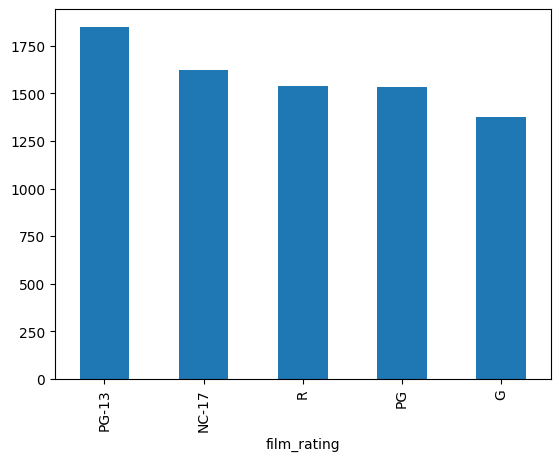

In [95]:
a = df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

a.plot(kind='bar')

#### how many rentals were made in Woodridge city with rental duration higher than 5 days?

In [96]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,0.598000


In [97]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

# lecture 3

In [98]:
import requests # type: ignore

#### we're going to pull cryptocurrencies prices from a public API and download them as Excel files

In [99]:
def get_historic_price(symbol, after='2018-09-01'):
    
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example
    
    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    
    data = resp.json()
    
    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [100]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2024-09-02 15:40:22.393873')

In [101]:
btc = get_historic_price('btc', after=last_week)

In [102]:
eth = get_historic_price('eth', after=last_week)

In [103]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-09-02 16:00:00,58540.5,58639.7,58301.9,58338.1,35.915427
2024-09-02 17:00:00,58338.2,58527.1,58318.0,58515.0,32.473440
2024-09-02 18:00:00,58515.0,58627.0,58318.0,58449.9,63.557328
2024-09-02 19:00:00,58450.0,58561.5,58406.9,58437.7,17.081581
2024-09-02 20:00:00,58437.8,59188.0,58429.8,59016.5,102.624450


In [104]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166 entries, 2024-09-02 16:00:00 to 2024-09-09 13:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   166 non-null    float64
 1   HighPrice   166 non-null    float64
 2   LowPrice    166 non-null    float64
 3   ClosePrice  166 non-null    float64
 4   Volume      166 non-null    float64
dtypes: float64(5)
memory usage: 7.8 KB


<Axes: xlabel='CloseTime'>

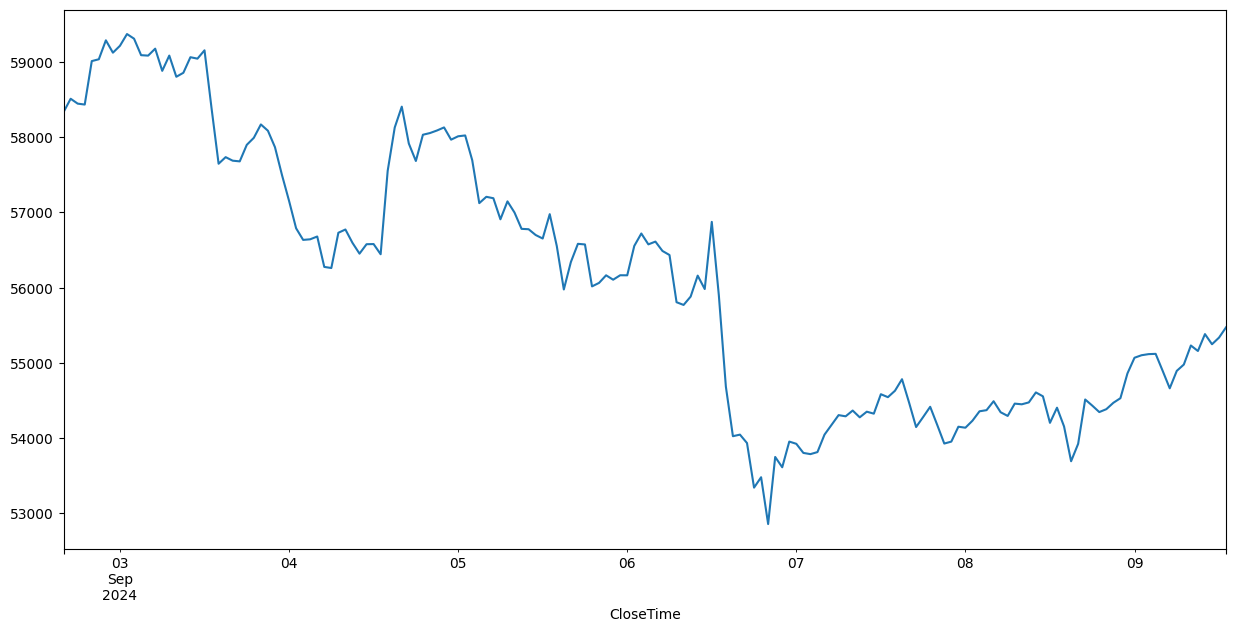

In [105]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [106]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-09-02 16:00:00,2515.09,2520.96,2506.27,2510.96,105.117766
2024-09-02 17:00:00,2511.51,2523.66,2511.51,2522.79,137.186675
2024-09-02 18:00:00,2522.66,2529.68,2516.54,2524.08,208.456220
2024-09-02 19:00:00,2523.69,2524.74,2519.86,2523.93,95.953162
2024-09-02 20:00:00,2524.40,2564.36,2522.51,2556.22,976.804922


<Axes: xlabel='CloseTime'>

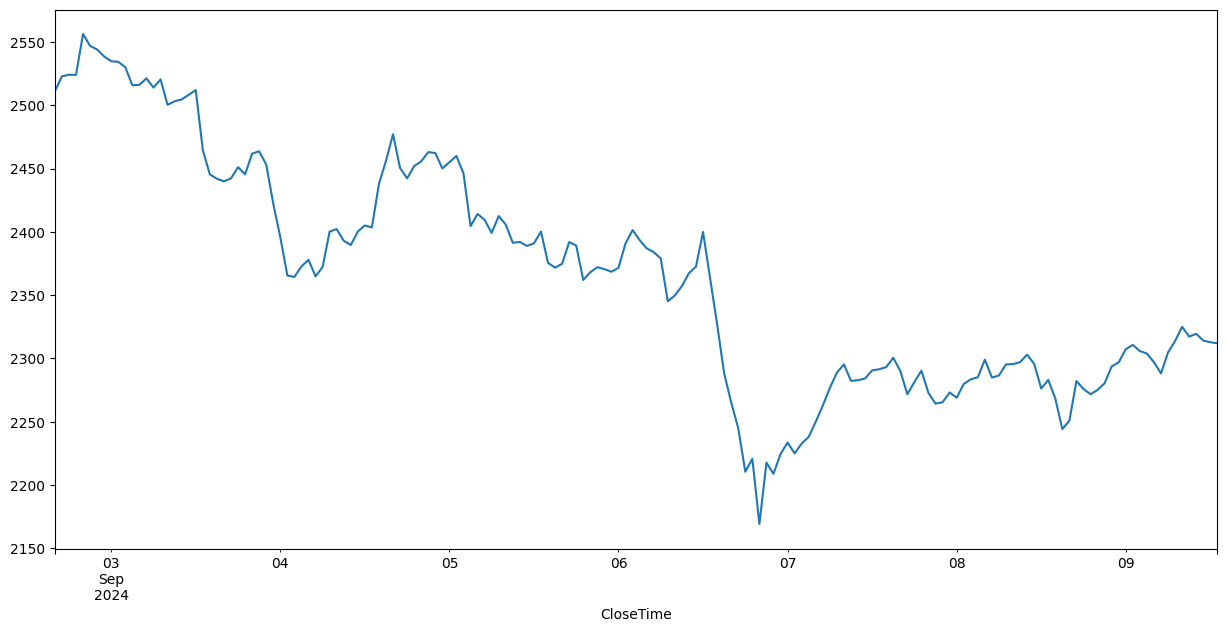

In [107]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [108]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-09-02 16:00:00,2515.09,2520.96,2506.27,2510.96,105.117766
2024-09-02 17:00:00,2511.51,2523.66,2511.51,2522.79,137.186675
2024-09-02 18:00:00,2522.66,2529.68,2516.54,2524.08,208.456220
2024-09-02 19:00:00,2523.69,2524.74,2519.86,2523.93,95.953162
2024-09-02 20:00:00,2524.40,2564.36,2522.51,2556.22,976.804922


#### dynamic plots with Bokeh. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

In [109]:
from bokeh.plotting import figure, output_file, show # type: ignore
from bokeh.io import output_notebook # type: ignore

In [110]:
output_notebook()

Loading BokehJS ...

In [111]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

#### we're now ready to generate an Excel file from the downloaded prices.

In [112]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [113]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [114]:
eth.to_excel(writer, sheet_name='Ether')

In [115]:
writer.close()

# lecture 4 - NumPy

In [116]:
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [117]:
a = np.array([1, 2, 3, 4])

In [118]:
b = np.array([0, .5, 1, 1.5, 2])

In [119]:
a[0], a[1]

(1, 2)

In [120]:
a[0:]

array([1, 2, 3, 4])

In [121]:
a[1:3]

array([2, 3])

In [122]:
a[1:-1]

array([2, 3])

In [123]:
a[::2] # [start:stop:step]

array([1, 3])

In [124]:
b[0], b[2], b[-1]

(0.0, 1.0, 2.0)

In [125]:
b[[0, 2, -1]] # multi-indexing

array([0., 1., 2.])

#### array types

In [126]:
a.dtype

dtype('int32')

In [127]:
b.dtype

dtype('float64')

In [128]:
np.array([1, 2, 3, 4], dtype=float)

array([1., 2., 3., 4.])

In [129]:
np.array([1, 2, 3, 4], dtype=np.int8)

array([1, 2, 3, 4], dtype=int8)

In [130]:
c = np.array(['a', 'b', 'c'])

In [131]:
c.dtype

dtype('<U1')

In [132]:
d = np.array([{'a': 1}, sys])

In [133]:
d.dtype

dtype('O')

#### dimensions and shapes

In [134]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

In [135]:
A.shape

(2, 3)

In [136]:
A.ndim # one horizontal and one vertical

2

In [137]:
A.size

6

In [138]:
B = np.array([
    [
        [12, 11, 10],
        [9, 8, 7],
    ],
    [
        [6, 5, 4],
        [3, 2, 1]
    ]
])

In [139]:
B

array([[[12, 11, 10],
        [ 9,  8,  7]],

       [[ 6,  5,  4],
        [ 3,  2,  1]]])

In [140]:
B.shape

(2, 2, 3)

In [141]:
B.ndim

3

In [142]:
B.size

12

In [143]:
C = np.array([
    [
        [12, 11, 10],
        [9, 8, 7]
    ],
    [
        [6, 5, 4]
    ]
], dtype=object)

In [144]:
C.dtype

dtype('O')

In [145]:
C.shape

(2,)

In [146]:
C.size

2

In [147]:
type(C[0])

list

#### indexing and slicing of Matrices

In [148]:
# Square matrix
A = np.array([
#.   0. 1. 2
    [1, 2, 3], # 0
    [4, 5, 6], # 1
    [7, 8, 9]  # 2
])

In [149]:
A[1] # take the second row

array([4, 5, 6])

In [150]:
A[1][0]

4

In [151]:
A[1, 0]

4

In [152]:
A[0:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [153]:
A[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

In [154]:
A[:2, :2]

array([[1, 2],
       [4, 5]])

In [155]:
A[:2, 2:]

array([[3],
       [6]])

In [156]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [157]:
A[1] = np.array([10, 10, 10])

In [158]:
A

array([[ 1,  2,  3],
       [10, 10, 10],
       [ 7,  8,  9]])

In [159]:
A[2] = 99

In [160]:
A

array([[ 1,  2,  3],
       [10, 10, 10],
       [99, 99, 99]])

#### summary statistics

In [161]:
a = np.array([1, 2, 3, 4])

In [162]:
a.sum()

10

In [163]:
a.mean()

2.5

In [164]:
a.std()

1.118033988749895

In [165]:
a.var()

1.25

In [166]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [167]:
A.sum()

45

In [168]:
A.mean()

5.0

In [169]:
A.std()

2.581988897471611

In [170]:
A.sum(axis=0)

array([12, 15, 18])

In [171]:
A.sum(axis=1)

array([ 6, 15, 24])

In [172]:
A.mean(axis=0)

array([4., 5., 6.])

In [173]:
A.mean(axis=1)

array([2., 5., 8.])

In [174]:
A.std(axis=0)

array([2.44948974, 2.44948974, 2.44948974])

In [175]:
A.std(axis=1)

array([0.81649658, 0.81649658, 0.81649658])

#### broadcasting and vectorized operations

In [176]:
a = np.arange(4)

In [177]:
a

array([0, 1, 2, 3])

In [178]:
a + 10

array([10, 11, 12, 13])

In [179]:
a * 10

array([ 0, 10, 20, 30])

In [180]:
a

array([0, 1, 2, 3])

In [181]:
a += 100

In [182]:
a

array([100, 101, 102, 103])

In [183]:
l = [0, 1, 2, 3]

In [184]:
[i * 10 for i in l]

[0, 10, 20, 30]

In [185]:
a = np.arange(4)

In [186]:
a

array([0, 1, 2, 3])

In [187]:
b = np.array([10, 10, 10, 10])

In [188]:
b

array([10, 10, 10, 10])

In [189]:
a + b

array([10, 11, 12, 13])

In [190]:
a * b

array([ 0, 10, 20, 30])

#### boolean arrays

In [191]:
a = np.arange(4)

In [192]:
a

array([0, 1, 2, 3])

In [193]:
a[0], a[-1]

(0, 3)

In [194]:
a[[0, -1]]

array([0, 3])

In [195]:
a[[True, False, False, True]]

array([0, 3])

In [196]:
a

array([0, 1, 2, 3])

In [197]:
a >= 2

array([False, False,  True,  True])

In [198]:
a[a >= 2]

array([2, 3])

In [199]:
a.mean()

1.5

In [200]:
a[a > a.mean()]

array([2, 3])

In [201]:
a[~(a > a.mean())]

array([0, 1])

In [202]:
a[(a == 0) | (a == 1)]

array([0, 1])

In [203]:
a[(a <= 2) & (a % 2 == 0)]

array([0, 2])

In [204]:
A = np.random.randint(100, size=(3, 3))

In [205]:
A

array([[49, 34, 90],
       [91, 30, 51],
       [54, 53, 95]])

In [206]:
A[np.array([
    [True, False, True],
    [False, True, False],
    [True, False, True]
])]

array([49, 90, 30, 54, 95])

In [207]:
A > 30

array([[ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True]])

In [208]:
A[A > 30]

array([49, 34, 90, 91, 51, 54, 53, 95])

#### linear algebra

In [209]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [210]:
B = np.array([
    [6, 5],
    [4, 3],
    [2, 1]
])

In [211]:
A.dot(B) # product

array([[20, 14],
       [56, 41],
       [92, 68]])

In [212]:
A @ B # product

array([[20, 14],
       [56, 41],
       [92, 68]])

In [213]:
B.T # transpose

array([[6, 4, 2],
       [5, 3, 1]])

In [214]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [215]:
B.T @ A

array([[36, 48, 60],
       [24, 33, 42]])

#### size of objects in Memory

In [216]:
# An integer in Python is > 24bytes
sys.getsizeof(1)

28

In [217]:
# Longs are even larger
sys.getsizeof(10**100)

72

In [218]:
# Numpy size is much smaller
np.dtype(int).itemsize

4

In [219]:
# Numpy size is much smaller
np.dtype(np.int8).itemsize

1

In [220]:
np.dtype(float).itemsize

8

#### lsts are even larger

In [221]:
# A one-element list
sys.getsizeof([1])

64

In [222]:
# An array of one element in numpy
np.array([1]).nbytes

4

#### and performance is also important

In [223]:
l = list(range(100000))

In [224]:
a = np.arange(100000)

In [225]:
%time np.sum(a ** 2)

CPU times: total: 0 ns
Wall time: 0 ns


216474736

In [226]:
%time sum([x ** 2 for x in l])

CPU times: total: 15.6 ms
Wall time: 17 ms


333328333350000

#### useful Numpy functions

---
`random`

In [227]:
np.random.random(size=2)

array([0.85043633, 0.72904012])

In [228]:
np.random.normal(size=2)

array([0.03605178, 1.42072258])

In [229]:
np.random.rand(2, 4)

array([[0.49339883, 0.5256258 , 0.17351607, 0.5224061 ],
       [0.01550219, 0.36267283, 0.14199596, 0.83097373]])

---
`arange`

In [230]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [231]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])

In [232]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

---
`reshape`

In [233]:
np.arange(10).reshape(2, 5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [234]:
np.arange(10).reshape(5, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

---
`linspace`

In [235]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [236]:
np.linspace(0, 1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [237]:
np.linspace(0, 1, 20, False)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

---
`zeros`, `ones`, `empty`

In [238]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [239]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [240]:
np.zeros((3, 3), dtype=int)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [241]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [242]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [243]:
np.empty(5)

array([1., 1., 1., 1., 1.])

In [244]:
np.empty((2, 2))

array([[0.25, 0.5 ],
       [0.75, 1.  ]])

---
`identity` and `eye`

In [245]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [246]:
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [247]:
np.eye(8, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [248]:
np.eye(8, 4, k=1)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [249]:
np.eye(8, 4, k=-3)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [250]:
"Hello World"[6]

'W'

### exercise 4

#### create a numpy array of size 10, filled with zeros.

In [251]:
np.array([0]*10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### create a numpy array with values ranging from 10 to 49

In [252]:
np.arange(10,50)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

#### create a numpy matrix of 2*2 integers, filled with ones.

In [253]:
np.ones([2,2], dtype=int)

array([[1, 1],
       [1, 1]])

#### create a numpy matrix of 3*2 float numbers, filled with ones.

In [254]:
np.ones([3,2], dtype=float)

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

#### given the X numpy array, create a new numpy array with the same shape and type as X, filled with ones.

In [255]:
x = np.arange(4, dtype=int)

x

array([0, 1, 2, 3])

In [256]:
x_1 = np.ones(4, dtype=int)

x_1

array([1, 1, 1, 1])

In [257]:
np.ones_like(x)

array([1, 1, 1, 1])

#### create a numpy matrix of 4*4 integers, filled with fives.

In [258]:
np.ones([4,4], dtype=int)*5

array([[5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5],
       [5, 5, 5, 5]])

#### create a 3*3 identity numpy matrix with ones on the diagonal and zeros elsewhere.

In [259]:
np.eye(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [260]:
np.identity(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

#### create a numpy array, filled with 3 random integer values between 1 and 10.

In [261]:
np.random.randint(10, size=3)

array([6, 4, 7])

#### create a 3\*3\*3 numpy matrix, filled with random float values.

In [262]:
np.random.random((3,3,3)) 

array([[[0.89003977, 0.6708069 , 0.6310732 ],
        [0.39339647, 0.43348301, 0.37829977],
        [0.45955391, 0.53339179, 0.13624217]],

       [[0.69454695, 0.02197183, 0.03982931],
        [0.62690022, 0.43073114, 0.40048582],
        [0.89753645, 0.62731012, 0.68735506]],

       [[0.95225912, 0.87653002, 0.0873505 ],
        [0.99599301, 0.26788581, 0.03909568],
        [0.844656  , 0.64196758, 0.00359437]]])

#### create a numpy array with numbers from 1 to 10, in descending order.

In [263]:
np.arange(1, 11)[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

#### create a 3*3 numpy matrix, filled with values ranging from 0 to 8

In [264]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### given the X numpy array, show it's first element - last element - first 3 elements - all the middle elements - the elements in reverse position - odd position

In [265]:
x = np.array(['A','B','C','D','E'])

In [266]:
x[0]

'A'

In [267]:
x[-1]

'E'

In [268]:
x[0:3]

array(['A', 'B', 'C'], dtype='<U1')

In [269]:
x[1:-1]

array(['B', 'C', 'D'], dtype='<U1')

In [270]:
x[::-1]

array(['E', 'D', 'C', 'B', 'A'], dtype='<U1')

In [271]:
x[::2]

array(['A', 'C', 'E'], dtype='<U1')

#### given the X numpy matrix, show it's first row elements - last row elements - first element on first row - last element on last row - middle row elements - first two elements on the first two rows -  last two elements on the last two rows

In [272]:
x = np.array([
    [1,   2,  3,  4],
    [5,   6,  7,  8],
    [9,  10, 11, 12],
    [13, 14, 15, 16]
])

In [273]:
x[0]

array([1, 2, 3, 4])

In [274]:
x[-1]

array([13, 14, 15, 16])

In [275]:
#x[0][0]

x[0, 0]

1

In [276]:
#x[-1][-1]

x[-1, -1]

16

In [277]:
x[1:-1, 1:-1]

array([[ 6,  7],
       [10, 11]])

In [278]:
x[0:2, 0:2]

array([[1, 2],
       [5, 6]])

In [279]:
x[2:,2:]

array([[11, 12],
       [15, 16]])

#### order (sort) the given numpy array

In [280]:
X = [0, 10, -5, 40, -3]

X.sort()
X

[-5, -3, 0, 10, 40]

#### given the X numpy array, get numbers equal to 2 or 10

In [281]:
X = np.array([-1, 2, 0, -4, 5, 6, 0, 0, -9, 10])

mask = (X == 2) | (X == 10)
X[mask]

array([ 2, 10])

#### given the X numpy array, show the sum of its elements

In [282]:
X = np.array([3, 5, 6, 7, 2, 3, 4, 9, 4])

#np.sum(X)
X.sum()

43

#### given the X numpy matrix, show the sum of its columns

In [283]:
X = np.array([
    [1,   2,  3,  4],
    [5,   6,  7,  8],
    [9,  10, 11, 12],
    [13, 14, 15, 16]
])

X.sum(axis=0) # axis=0 columns; axis=1 rows

array([28, 32, 36, 40])

#### given the X numpy array, show the max value of its elements

In [284]:
X = np.array([1, 2, 0, 4, 5, 6, 0, 0, 9, 10])

X.max()

10

# lecture 5 - Pandas